<a href="https://colab.research.google.com/github/jonchung1205/DrugDiscovery/blob/main/CDD_ML_Part_2_Exploratory_Data_Analysis_ACC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Exploratory Data Analysis**


In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-01-06 05:32:15--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   171MB/s    in 0.5s    

2024-01-06 05:32:16 (171 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-packa

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ACC_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL326563,CCC/C(=N\OCC)C1=C(O)CC(CC(C)SCC)CC1=O,40000.00,inactive
1,CHEMBL111617,C=CCO/N=C(\CCC)C1=C(O)C(C(=O)OC)C(C)(C)CC1=O,100000.00,inactive
2,CHEMBL113137,CCC/C(=N\OCC)C1=C(O)CC(C2CCCSC2)CC1=O,40000.00,inactive
3,CHEMBL111058,CCSC(C)CC1CC(=O)C(/C(CC)=N/OC/C=C/Cl)=C(O)C1,40000.00,inactive
4,CHEMBL60556,CCO/N=C(\CC)C1=C(O)CC(c2c(C)cc(C)cc2C)CC1=O,40000.00,active
...,...,...,...,...
150,CHEMBL3629703,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)C3)CC2)cc...,510.00,NaN
151,CHEMBL3629702,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)CC3)C2)cc...,1000.00,NaN
152,CHEMBL3644846,CC(=O)N[C@@H](C)COc1ccc(Oc2ccc(OC(C)C)cc2)cc1,10000.00,NaN
153,CHEMBL1630715,CC(=O)N[C@@H](C)CCc1ccc(Oc2ccc(OC(C)C)nc2)cc1,170.00,NaN


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL326563,40000.00,inactive,CCC/C(=N\OCC)C1=C(O)CC(CC(C)SCC)CC1=O
1,CHEMBL111617,100000.00,inactive,C=CCO/N=C(\CCC)C1=C(O)C(C(=O)OC)C(C)(C)CC1=O
2,CHEMBL113137,40000.00,inactive,CCC/C(=N\OCC)C1=C(O)CC(C2CCCSC2)CC1=O
3,CHEMBL111058,40000.00,inactive,CCSC(C)CC1CC(=O)C(/C(CC)=N/OC/C=C/Cl)=C(O)C1
4,CHEMBL60556,40000.00,active,CCO/N=C(\CC)C1=C(O)CC(c2c(C)cc(C)cc2C)CC1=O
...,...,...,...,...
150,CHEMBL3629703,510.00,NaN,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)C3)CC2)cc...
151,CHEMBL3629702,1000.00,NaN,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)CC3)C2)cc...
152,CHEMBL3644846,10000.00,NaN,CC(=O)N[C@@H](C)COc1ccc(Oc2ccc(OC(C)C)cc2)cc1
153,CHEMBL1630715,170.00,NaN,CC(=O)N[C@@H](C)CCc1ccc(Oc2ccc(OC(C)C)nc2)cc1


## **Calculate Lipinski descriptors**

### **Import libraries**

In [ ]:
import numpy as np
!pip install rdkit-pypi
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,327.490,4.50190,1.0,5.0
1,323.389,2.94540,1.0,6.0
2,325.474,4.11340,1.0,5.0
3,359.919,4.84440,1.0,5.0
4,329.440,4.67296,1.0,4.0
...,...,...,...,...
150,398.507,3.73452,1.0,4.0
151,398.507,3.73452,1.0,4.0
152,343.423,4.16950,1.0,4.0
153,342.439,4.11830,1.0,4.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,327.490,4.50190,1.0,5.0
1,323.389,2.94540,1.0,6.0
2,325.474,4.11340,1.0,5.0
3,359.919,4.84440,1.0,5.0
4,329.440,4.67296,1.0,4.0
...,...,...,...,...
150,398.507,3.73452,1.0,4.0
151,398.507,3.73452,1.0,4.0
152,343.423,4.16950,1.0,4.0
153,342.439,4.11830,1.0,4.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL326563,CCC/C(=N\OCC)C1=C(O)CC(CC(C)SCC)CC1=O,40000.00,inactive
1,CHEMBL111617,C=CCO/N=C(\CCC)C1=C(O)C(C(=O)OC)C(C)(C)CC1=O,100000.00,inactive
2,CHEMBL113137,CCC/C(=N\OCC)C1=C(O)CC(C2CCCSC2)CC1=O,40000.00,inactive
3,CHEMBL111058,CCSC(C)CC1CC(=O)C(/C(CC)=N/OC/C=C/Cl)=C(O)C1,40000.00,inactive
4,CHEMBL60556,CCO/N=C(\CC)C1=C(O)CC(c2c(C)cc(C)cc2C)CC1=O,40000.00,active
...,...,...,...,...
150,CHEMBL3629703,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)C3)CC2)cc...,510.00,NaN
151,CHEMBL3629702,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)CC3)C2)cc...,1000.00,NaN
152,CHEMBL3644846,CC(=O)N[C@@H](C)COc1ccc(Oc2ccc(OC(C)C)cc2)cc1,10000.00,NaN
153,CHEMBL1630715,CC(=O)N[C@@H](C)CCc1ccc(Oc2ccc(OC(C)C)nc2)cc1,170.00,NaN


Combine the 2 data frames

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL326563,CCC/C(=N\OCC)C1=C(O)CC(CC(C)SCC)CC1=O,40000.00,inactive,327.490,4.50190,1.0,5.0
1,CHEMBL111617,C=CCO/N=C(\CCC)C1=C(O)C(C(=O)OC)C(C)(C)CC1=O,100000.00,inactive,323.389,2.94540,1.0,6.0
2,CHEMBL113137,CCC/C(=N\OCC)C1=C(O)CC(C2CCCSC2)CC1=O,40000.00,inactive,325.474,4.11340,1.0,5.0
3,CHEMBL111058,CCSC(C)CC1CC(=O)C(/C(CC)=N/OC/C=C/Cl)=C(O)C1,40000.00,inactive,359.919,4.84440,1.0,5.0
4,CHEMBL60556,CCO/N=C(\CC)C1=C(O)CC(c2c(C)cc(C)cc2C)CC1=O,40000.00,active,329.440,4.67296,1.0,4.0
...,...,...,...,...,...,...,...,...
150,CHEMBL3629703,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)C3)CC2)cc...,510.00,NaN,398.507,3.73452,1.0,4.0
151,CHEMBL3629702,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)CC3)C2)cc...,1000.00,NaN,398.507,3.73452,1.0,4.0
152,CHEMBL3644846,CC(=O)N[C@@H](C)COc1ccc(Oc2ccc(OC(C)C)cc2)cc1,10000.00,NaN,343.423,4.16950,1.0,4.0
153,CHEMBL1630715,CC(=O)N[C@@H](C)CCc1ccc(Oc2ccc(OC(C)C)nc2)cc1,170.00,NaN,342.439,4.11830,1.0,4.0


### **Convert IC50 to pIC50**


In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count       155.000000
mean       5233.988581
std       12673.015796
min           7.000000
25%          29.500000
50%         240.000000
75%        2370.000000
max      100000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-41-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL326563,CCC/C(=N\OCC)C1=C(O)CC(CC(C)SCC)CC1=O,inactive,327.490,4.50190,1.0,5.0,40000.00
1,CHEMBL111617,C=CCO/N=C(\CCC)C1=C(O)C(C(=O)OC)C(C)(C)CC1=O,inactive,323.389,2.94540,1.0,6.0,100000.00
2,CHEMBL113137,CCC/C(=N\OCC)C1=C(O)CC(C2CCCSC2)CC1=O,inactive,325.474,4.11340,1.0,5.0,40000.00
3,CHEMBL111058,CCSC(C)CC1CC(=O)C(/C(CC)=N/OC/C=C/Cl)=C(O)C1,inactive,359.919,4.84440,1.0,5.0,40000.00
4,CHEMBL60556,CCO/N=C(\CC)C1=C(O)CC(c2c(C)cc(C)cc2C)CC1=O,active,329.440,4.67296,1.0,4.0,40000.00
...,...,...,...,...,...,...,...,...
150,CHEMBL3629703,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)C3)CC2)cc...,NaN,398.507,3.73452,1.0,4.0,510.00
151,CHEMBL3629702,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)CC3)C2)cc...,NaN,398.507,3.73452,1.0,4.0,1000.00
152,CHEMBL3644846,CC(=O)N[C@@H](C)COc1ccc(Oc2ccc(OC(C)C)cc2)cc1,NaN,343.423,4.16950,1.0,4.0,10000.00
153,CHEMBL1630715,CC(=O)N[C@@H](C)CCc1ccc(Oc2ccc(OC(C)C)nc2)cc1,NaN,342.439,4.11830,1.0,4.0,170.00


In [ ]:
df_norm.standard_value_norm.describe()

count       155.000000
mean       5233.988581
std       12673.015796
min           7.000000
25%          29.500000
50%         240.000000
75%        2370.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-37-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL326563,CCC/C(=N\OCC)C1=C(O)CC(CC(C)SCC)CC1=O,inactive,327.490,4.50190,1.0,5.0,4.397940
1,CHEMBL111617,C=CCO/N=C(\CCC)C1=C(O)C(C(=O)OC)C(C)(C)CC1=O,inactive,323.389,2.94540,1.0,6.0,4.000000
2,CHEMBL113137,CCC/C(=N\OCC)C1=C(O)CC(C2CCCSC2)CC1=O,inactive,325.474,4.11340,1.0,5.0,4.397940
3,CHEMBL111058,CCSC(C)CC1CC(=O)C(/C(CC)=N/OC/C=C/Cl)=C(O)C1,inactive,359.919,4.84440,1.0,5.0,4.397940
4,CHEMBL60556,CCO/N=C(\CC)C1=C(O)CC(c2c(C)cc(C)cc2C)CC1=O,active,329.440,4.67296,1.0,4.0,4.397940
...,...,...,...,...,...,...,...,...
150,CHEMBL3629703,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)C3)CC2)cc...,NaN,398.507,3.73452,1.0,4.0,6.292430
151,CHEMBL3629702,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)CC3)C2)cc...,NaN,398.507,3.73452,1.0,4.0,6.000000
152,CHEMBL3644846,CC(=O)N[C@@H](C)COc1ccc(Oc2ccc(OC(C)C)cc2)cc1,NaN,343.423,4.16950,1.0,4.0,5.000000
153,CHEMBL1630715,CC(=O)N[C@@H](C)CCc1ccc(Oc2ccc(OC(C)C)nc2)cc1,NaN,342.439,4.11830,1.0,4.0,6.769551


In [ ]:
df_final.pIC50.describe()

count    155.000000
mean       6.488924
std        1.138636
min        4.000000
25%        5.626244
50%        6.619789
75%        7.530240
max        8.154902
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [ ]:
df_final.to_csv('ACC_04_bioactivity_data_3class_pIC50.csv')

Removing the ``intermediate`` class from data set.

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL326563,CCC/C(=N\OCC)C1=C(O)CC(CC(C)SCC)CC1=O,inactive,327.490,4.50190,1.0,5.0,4.397940
1,CHEMBL111617,C=CCO/N=C(\CCC)C1=C(O)C(C(=O)OC)C(C)(C)CC1=O,inactive,323.389,2.94540,1.0,6.0,4.000000
2,CHEMBL113137,CCC/C(=N\OCC)C1=C(O)CC(C2CCCSC2)CC1=O,inactive,325.474,4.11340,1.0,5.0,4.397940
3,CHEMBL111058,CCSC(C)CC1CC(=O)C(/C(CC)=N/OC/C=C/Cl)=C(O)C1,inactive,359.919,4.84440,1.0,5.0,4.397940
4,CHEMBL60556,CCO/N=C(\CC)C1=C(O)CC(c2c(C)cc(C)cc2C)CC1=O,active,329.440,4.67296,1.0,4.0,4.397940
...,...,...,...,...,...,...,...,...
150,CHEMBL3629703,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)C3)CC2)cc...,NaN,398.507,3.73452,1.0,4.0,6.292430
151,CHEMBL3629702,Cc1cc(C(=O)N2CCC3(CCN(C(=O)OC(C)(C)C)CC3)C2)cc...,NaN,398.507,3.73452,1.0,4.0,6.000000
152,CHEMBL3644846,CC(=O)N[C@@H](C)COc1ccc(Oc2ccc(OC(C)C)cc2)cc1,NaN,343.423,4.16950,1.0,4.0,5.000000
153,CHEMBL1630715,CC(=O)N[C@@H](C)CCc1ccc(Oc2ccc(OC(C)C)nc2)cc1,NaN,342.439,4.11830,1.0,4.0,6.769551


Let's write this to CSV file.

In [ ]:
df_2class.to_csv('ACC_05_bioactivity_data_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

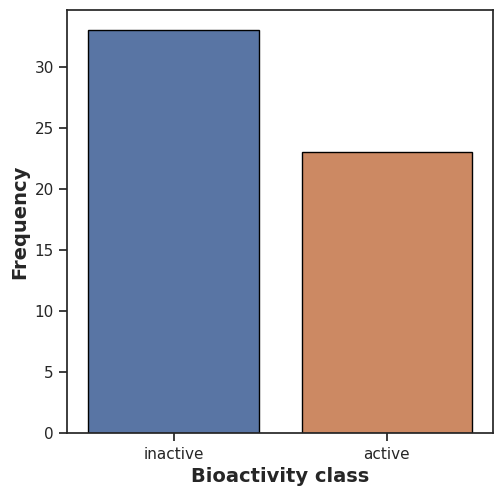

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

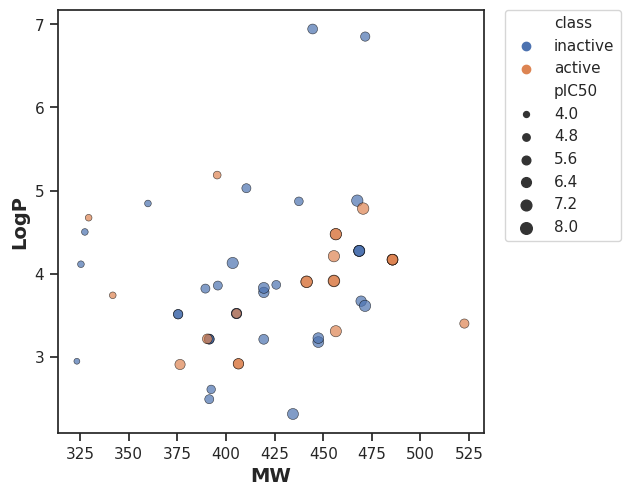

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

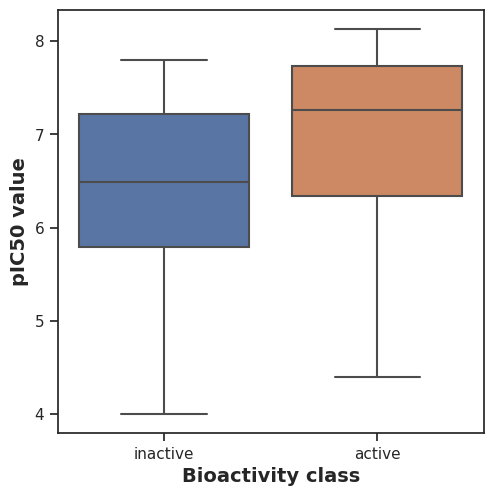

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,514.5,0.025029,0.05,Different distribution (reject H0)


#### **MW**

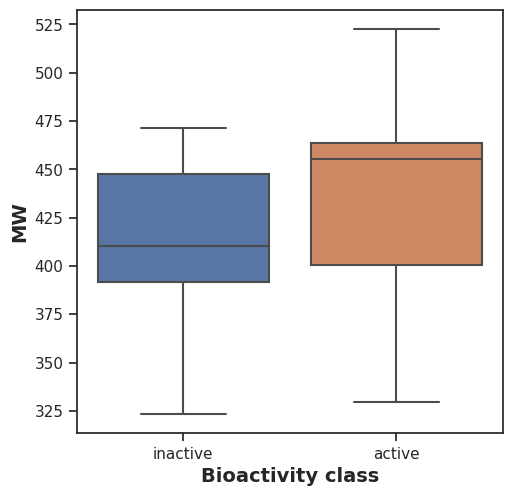

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,484.0,0.083129,0.05,Same distribution (fail to reject H0)


#### **LogP**

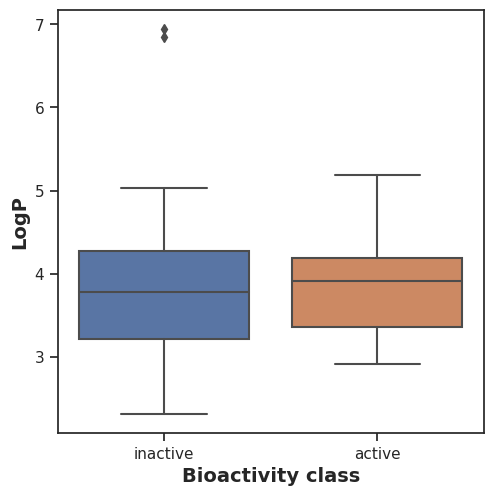

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,410.5,0.611284,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

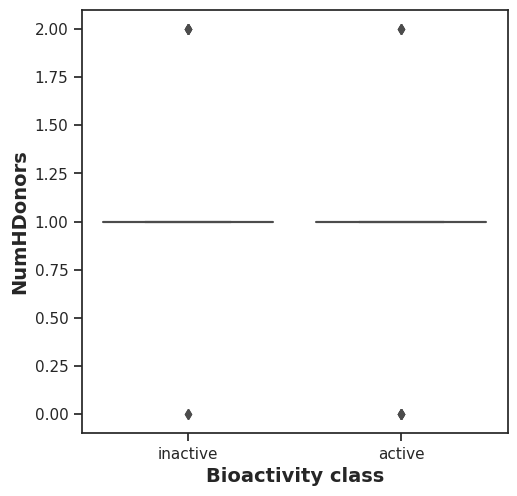

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,321.5,0.217443,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

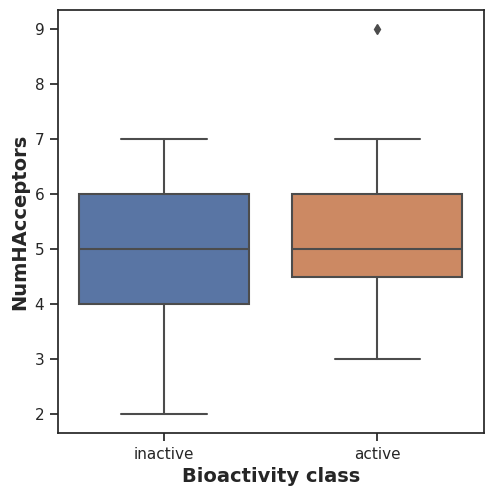

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,421.5,0.468121,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **Lipinski's descriptors**

One of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: ACC_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 20%)
  adding: EGFR_03_bioactivity_data_curated.csv (deflated 96%)
  adding: plot_NumHAcceptors.pdf (deflated 36%)
  adding: plot_NumHDonors.pdf (deflated 40%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: ACC_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: ACC_03_bioactivity_data_curated.csv (deflated 82%)
  adding: plot_MW.pdf (deflated 39%)
